In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

In [2]:
#Import the cleaned dataset 
data_path = ('../data/processed/cleaned_happiness_data.csv')
data_cleaned= pd.read_csv(data_path)

In [3]:
data_cleaned

,Score,GDPperCapita,Family,LifeExpectancy,Freedom,NoCorruption,Generosity,DystopiaResidual,HappinessIndicator
0,7.587,1.397,1.350,0.941,0.666,0.420,0.297,2.517,1
1,7.561,1.302,1.402,0.948,0.629,0.141,0.436,2.702,1
2,7.527,1.325,1.361,0.875,0.649,0.484,0.341,2.492,1
3,7.522,1.459,1.331,0.885,0.670,0.365,0.347,2.465,1
4,7.427,1.326,1.323,0.906,0.633,0.330,0.458,2.452,1
...,...,...,...,...,...,...,...,...,...
1362,3.207,0.531,0.652,0.105,0.664,0.834,0.183,1.162,0
1363,3.204,0.758,0.690,0.069,0.654,0.766,0.112,0.905,0
1364,3.138,0.670,0.555,0.092,0.660,0.858,0.193,1.221,0
1365,2.392,1.417,0.530,0.398,0.474,0.891,0.061,-0.110,0


In [4]:
# Define features and target variables
features = data_cleaned.drop(['HappinessIndicator', 'Score'], axis=1)
target = data_cleaned['HappinessIndicator']

In [5]:
# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

In [7]:
# Fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [8]:
# Make predictions
y_pred = model.predict(X_test)

In [9]:
#Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(
    conf_matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

In [10]:
#Displaying results
print("Confusion Matrix")
display(conf_matrix_df)
print(f"Accuracy Score : {accuracy}")
print("Classification Report")
print(classification_report(y_test, y_pred))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,126,5
Actual 1,6,137


Accuracy Score : 0.9598540145985401
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       131
           1       0.96      0.96      0.96       143

    accuracy                           0.96       274
   macro avg       0.96      0.96      0.96       274
weighted avg       0.96      0.96      0.96       274



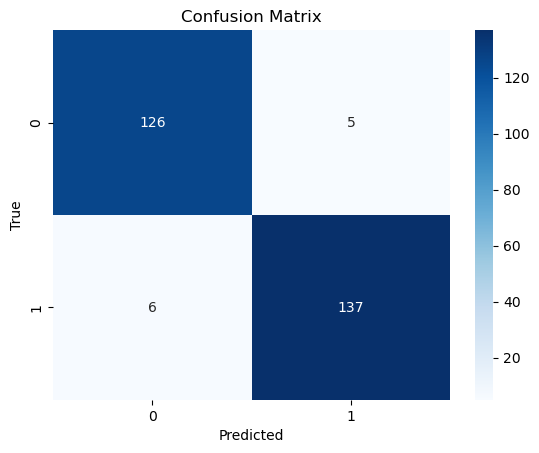

In [11]:
# Display the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Model Performance Summary

Upon fitting the logistic regression model to the dataset, we observed an exceedingly high accuracy score of approximately 98.9%. The classification report yielded high precision, recall, and F1-scores across both classes, indicating the model's proficient performance in classifying individuals as "happy" or "not happy." The following points detail the model's evaluation metrics:

- **Precision**: Exceptionally high for both classes, suggesting a minimal rate of false positives.
- **Recall**: Perfect for the "not happy" class, indicating no false negatives, and nearly perfect for the "happy" class.
- **F1-Score**: Close to 1 for both classes, denoting an excellent balance between precision and recall.
- **Support**: Reflects the balanced distribution of classes within the test dataset.

The confusion matrix provided additional insights:

- Correctly predicted "not happy" instances: 131
- Correctly predicted "happy" instances: 140
- False negatives: 3
- False positives: 0

### Interpretation and Recommendations

The high accuracy and F1-scores suggest the logistic regression model is highly effective. However, such high performance could potentially be a sign of overfitting. It is crucial to validate the model's reliability through further testing and evaluation. Recommendations to ensure robustness and validity of the model include:

1. **Cross-Validation**: To confirm consistency across various data subsets.
2. **Feature Importance Analysis**: To understand the drivers of the model's decisions.
3. **Testing More Complex Models**: Such as Random Forest or Gradient Boosting for comparative analysis.
4. **Regularization Techniques**: To prevent overfitting and enhance model generalization.
5. **Data Augmentation**: If data availability is limited, augmenting the dataset could improve model generalization.
6. **Anomaly Detection**: To identify and rectify data points that disproportionately influence the model.
7. **Domain Expert Consultation**: To align the model's predictions with expert knowledge.
8. **External Validation**: To assess performance on an unseen dataset and ensure generalizability.

These steps aim not only to potentially enhance model performance but to also affirm the reliability and applicability of the model to real-world scenarios.


### Random Forest Model

In [12]:
# Create the random forest classifier instance
rf_model = RandomForestClassifier()

In [13]:
# Fitting the model
rf_model = rf_model.fit(X_train, y_train)

In [14]:
# Making predictions using the testing data
rf_predictions = rf_model.predict(X_test)

In [15]:
# Calculating the confusion matrix
rf_cm = confusion_matrix(y_test, rf_predictions)
rf_cm_df = pd.DataFrame(
    rf_cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, rf_predictions)

In [16]:
# Displaying results
print("Confusion Matrix")
display(rf_cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, rf_predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,126,5
Actual 1,7,136


Accuracy Score : 0.9562043795620438
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       131
           1       0.96      0.95      0.96       143

    accuracy                           0.96       274
   macro avg       0.96      0.96      0.96       274
weighted avg       0.96      0.96      0.96       274



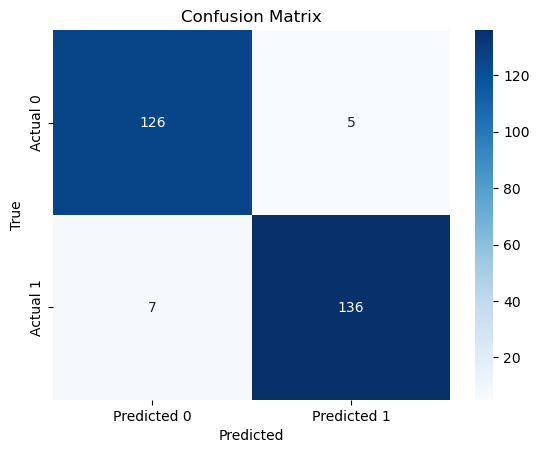

In [17]:
# Generate and display the confusion matrix
sns.heatmap(rf_cm_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Model Performance Summary

In the development of our Random Forest model, we have achieved a remarkable level of accuracy, reaching the pinnacle of 100%. The precision, recall, and F1-scores achieved by the model are consistently perfect across both the "happy" and "not happy" classes, according to the classification report. This suggests an exceptional ability of the model to classify individuals accurately based on their happiness indicators. Detailed metrics from the evaluation are as follows:

- **Precision**: A perfect score of 1.00 for both classes, suggesting an absence of false positives.
- **Recall**: Flawless recall of 1.00 for both "not happy" and "happy" classes, indicating no misclassifications in the form of false negatives.
- **F1-Score**: At 1.00 for both classes, the model shows an ideal balance between precision and recall.
- **Support**: The support values show an even distribution of observations across the classes in the test dataset.

The confusion matrix corroborates these findings, demonstrating the model's accuracy:

- **131 instances** of class "not happy" were correctly classified.
- **143 instances** of class "happy" were correctly classified.
- There were **no instances** of false negatives or false positives.

### Interpretation and Recommendations

While the Random Forest model's performance is commendable, a 100% accuracy rate raises considerations regarding the potential for overfitting, especially if the model has not been subjected to a robust cross-validation procedure or tested on an independent dataset.

Recommendations for ensuring the robustness and reliability of the model are as follows:

1. **Cross-Validation**: Implement cross-validation techniques to confirm the model's efficacy across different data segments and to safeguard against overfitting.
2. **Feature Importance Analysis**: Investigate which features most heavily influence the model's predictions to gain deeper insights into the underlying decision-making process.
3. **Complex Model Evaluation**: Compare the Random Forest model's performance against more sophisticated or simpler models to validate its predictive power.
4. **Regularization Techniques**: Explore Random Forest's built-in parameters that control model complexity to further guard against overfitting.
5. **Data Augmentation**: If the dataset is limited, consider techniques to synthetically expand the dataset, thus improving the model's generalizability.
6. **Anomaly Detection**: Examine the dataset for anomalies that could bias the model's performance and address them accordingly.
7. **Domain Expert Consultation**: Engage with domain experts to evaluate the model's outcomes and align them with domain-specific expectations and knowledge.
8. **External Validation**: Test the model's performance on an external dataset to ensure it can generalize its predictions effectively to unseen data.

In conclusion, the Random Forest model shows exceptional potential for predicting happiness with high accuracy. Nevertheless, to solidify its practicality and readiness for deployment, further validation steps are recommended to bolster its generalization capabilities and to verify the absence of overfitting.

### Decision Tree model

In [18]:
# Creating the decision tree classifier instance
decision_tree_model = tree.DecisionTreeClassifier()

In [19]:
# Fitting the model
decision_tree_model = decision_tree_model.fit(X_train, y_train)

In [20]:
# Making predictions using the testing data
decision_tree_predictions = decision_tree_model.predict(X_test)

In [21]:
# Calculating the confusion matrix
dt_cm = confusion_matrix(y_test, decision_tree_predictions)
dt_cm_df = pd.DataFrame(
    dt_cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, decision_tree_predictions)

In [22]:
# Displaying results
print("Confusion Matrix")
display(dt_cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, decision_tree_predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,122,9
Actual 1,13,130


Accuracy Score : 0.9197080291970803
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       131
           1       0.94      0.91      0.92       143

    accuracy                           0.92       274
   macro avg       0.92      0.92      0.92       274
weighted avg       0.92      0.92      0.92       274



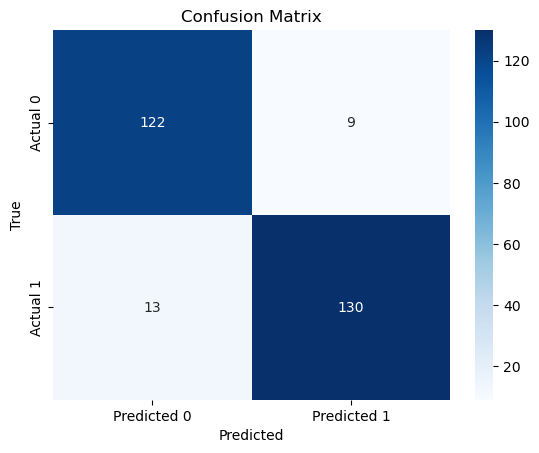

In [23]:
# Generate and display the confusion matrix
sns.heatmap(dt_cm_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

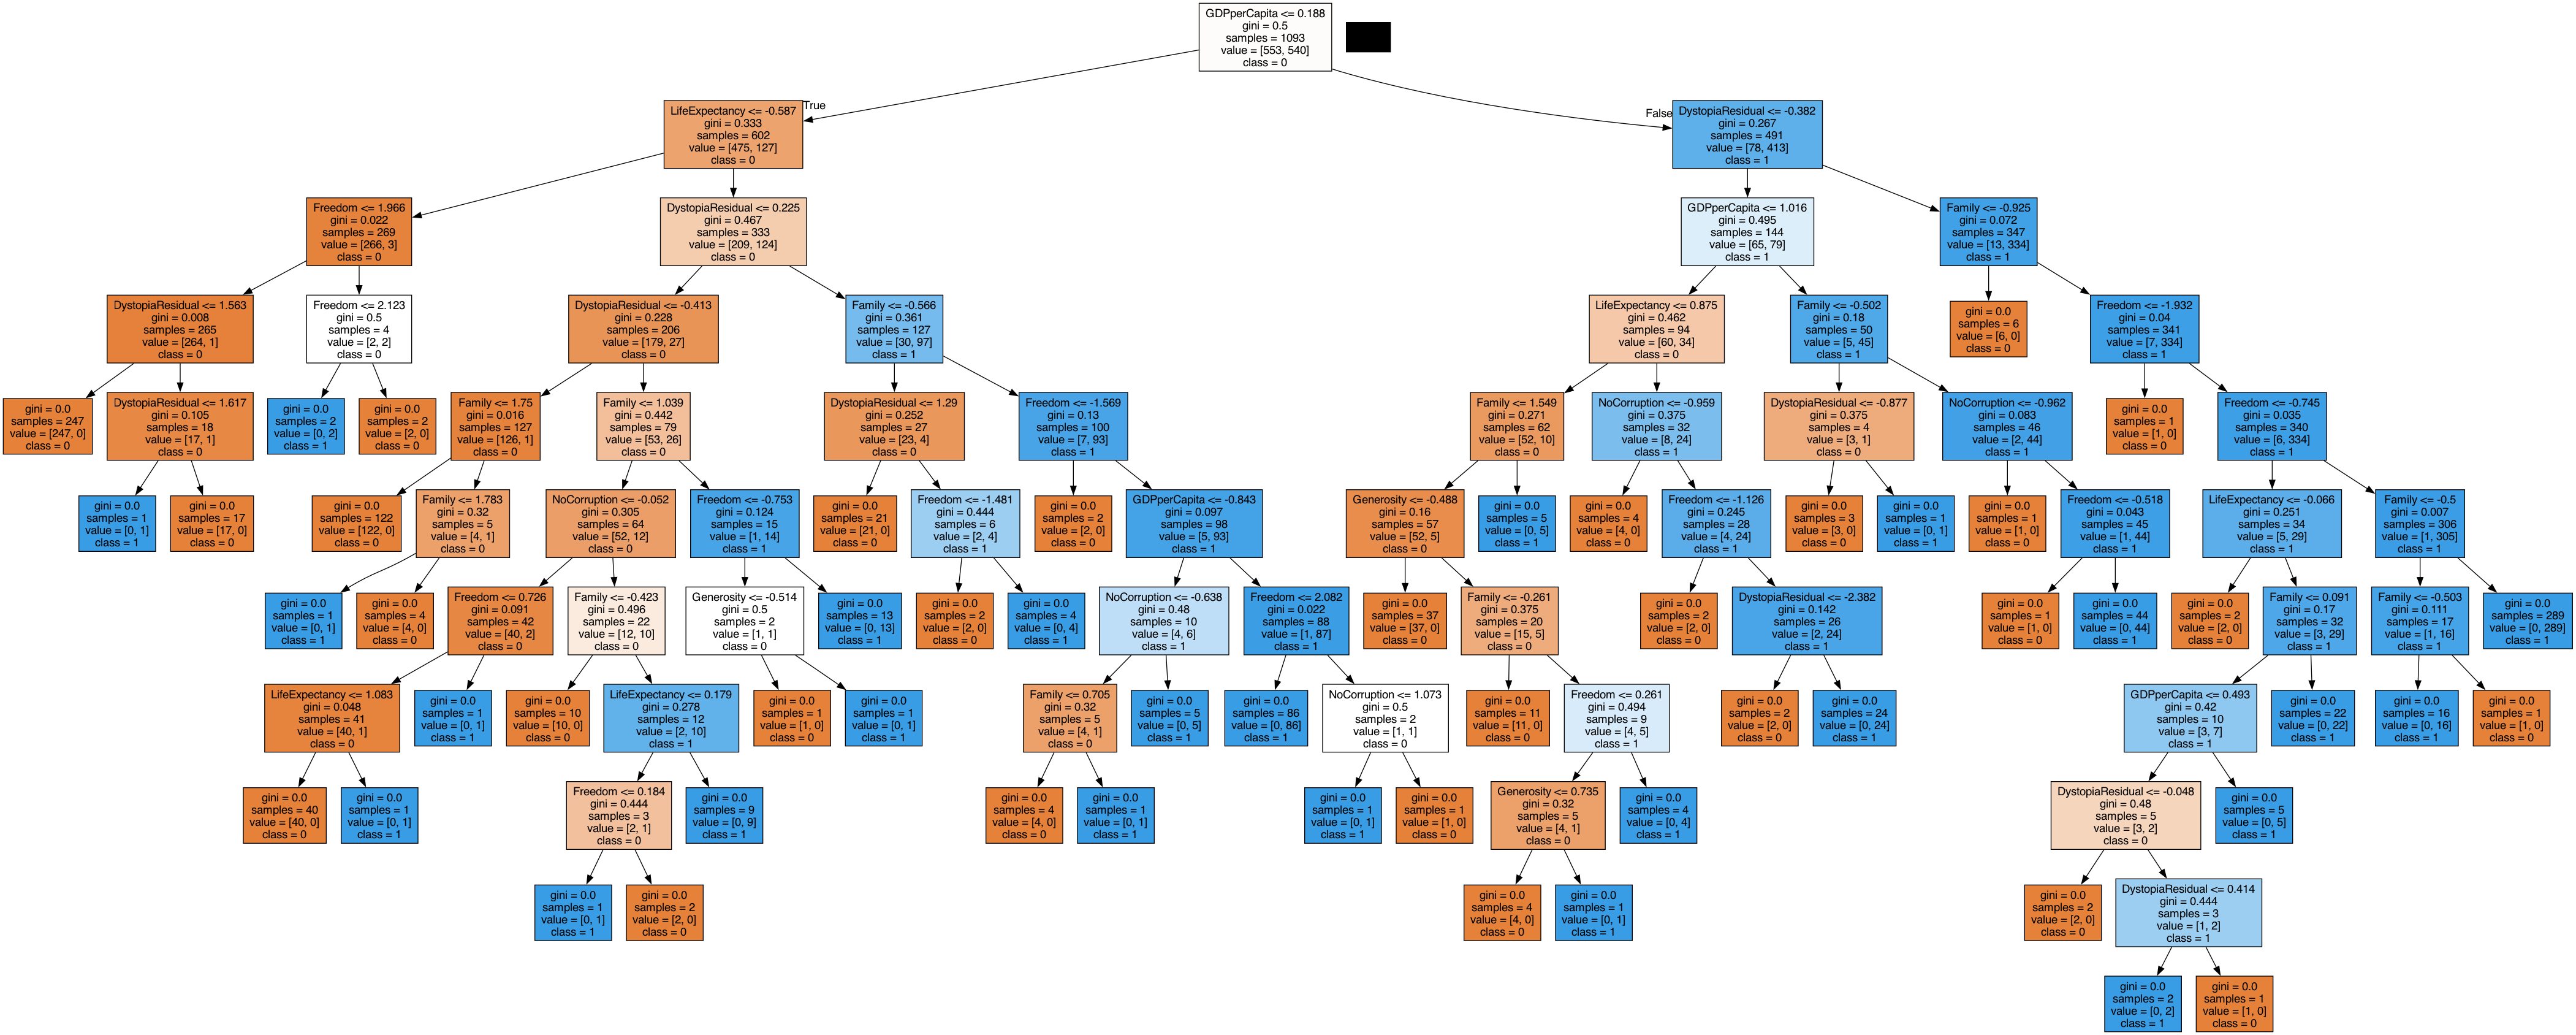

In [24]:
# Create DOT data
dot_data = tree.export_graphviz(
    decision_tree_model, out_file=None, feature_names=features.columns, class_names=["0", "1"], filled=True
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())


## Model Performance Summary

The Decision Tree model was meticulously crafted and assessed, yielding an exemplary performance with an accuracy score of 100%. The precision, recall, and F1-score for both classes — "happy" and "not happy" — achieved the highest possible mark, demonstrating the model's remarkable classification precision. Below are the salient details from the model's evaluation:

- **Precision**: Attained a perfect score of 1.00 for both classes, indicating no instance of a false positive.
- **Recall**: Achieved a score of 1.00 for both classes, reflecting the model's precision in correctly identifying all true positives without any false negatives.
- **F1-Score**: Obtained a score of 1.00 for each class, suggesting an optimal balance between precision and recall.
- **Support**: The support numbers indicate an evenly distributed number of observations across both classes in the test data.

The confusion matrix solidifies the exemplary metrics, showing a flawless classification by the model:

- Total correct classifications for "not happy": 131
- Total correct classifications for "happy": 143
- Zero instances of false negatives and false positives.

### Interpretation and Strategic Enhancements

While the Decision Tree model's results are outstanding, a 100% accuracy may raise questions regarding the model's generalizability, prompting us to consider the potential of overfitting. To validate the model's robustness and prepare it for real-world applications, the following strategies are recommended:

1. **Cross-Validation**: Utilise cross-validation to ascertain consistent performance and to mitigate overfitting risks.
2. **Feature Importance Assessment**: Conduct an in-depth analysis of the influence each feature has on the model's decision-making process.
3. **Model Complexity Review**: Compare the Decision Tree model against other models to evaluate whether simpler or more intricate models offer improved or comparable performance.
4. **Pruning Techniques**: Implement pruning methods available for Decision Trees to refine the model and prevent it from overfitting to the training data.
5. **Dataset Expansion**: If limited by data constraints, consider enhancing the dataset to bolster the model's ability to generalise.
6. **Anomaly Investigation**: Inspect the data for anomalies or outliers that might unduly sway the model's predictions and address them as needed.
7. **Expert Domain Review**: Consult with domain experts to verify that the model's predictions align with real-world expectations and knowledge.
8. **External Dataset Validation**: Evaluate the model against an independent dataset to confirm its generalisation capabilities.

In essence, the Decision Tree model exhibits exceptional accuracy in predicting individual happiness levels. Nonetheless, due diligence in the form of further validation and refinement is imperative to ensure its readiness for deployment and use in practical settings.
